<a href="https://colab.research.google.com/github/sameera-shaik123/SCT_DS_3/blob/main/Decision_Tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank[1].zip to bank[1].zip


In [ ]:
import zipfile
import io
# Extract the uploaded file (automatically handles whatever you upload)
for filename in uploaded.keys():
    with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
        zip_ref.extractall()

In [ ]:
import os
for files in os.listdir():
  print(files)

.config
bank-names.txt
bank-full.csv
bank[1].zip
bank.csv
sample_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
X_train: (31647, 16)
y_train: (31647,)
X_test (13564, 16)
y_test (13564,)
Accuracy: 0.8897080507225

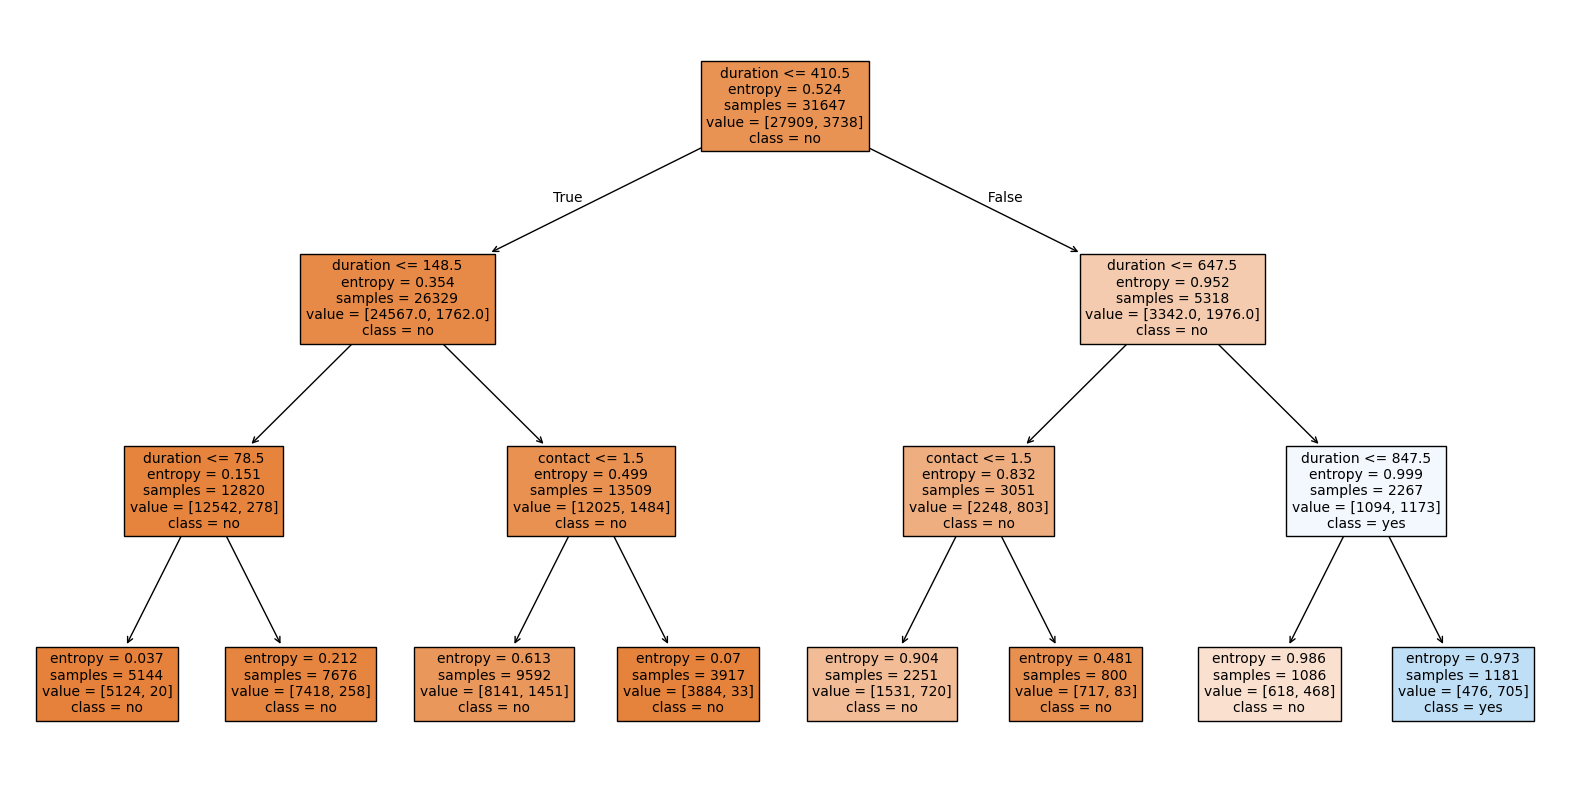

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#reading the file
df=pd.read_csv('bank-full.csv',sep=';')
#checking for information
df.head()
df.info()
df.describe()
#checking for null vaues
df.isnull().sum()
#importing label encoder
from sklearn.preprocessing import LabelEncoder
df_encoded=df.copy()
label_encoders={}
for column in df_encoded.columns:
  if df_encoded[column].dtype=='object':
    le=LabelEncoder()
    df_encoded[column]=le.fit_transform(df_encoded[column])
    label_encoders[column]=le
#separate features and targets
X=df_encoded.drop('y',axis=1)
y=df_encoded['y']
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)
#buidling a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3)
model.fit(X_train,y_train)
#evaluating the model
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,feature_names=X.columns,class_names=['no','yes'])
plt.show()





